In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
usedcarprices=pd.read_csv("E:/machine learning software/Datasets BITS/usedcarsales.csv")

In [5]:
#numpy package function called np.array()


In [6]:
usedcarprices.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,AutoType,MetColorType
0,1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Manual,Metcolor
1,2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Manual,Metcolor
2,3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Manual,Metcolor
3,4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Manual,NonMetcolor
4,5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Manual,NonMetcolor


THE ONLY TYPE OF ANALYSISON CATEGORICAL,CHARACTER OR STRING DATA IS FREQUENCY COUNTS-HOW MANY TYPES THE PARTICULAR CLASS OR ITMS REPEATING.


In [7]:
pd.value_counts(usedcarprices.FuelType)

Petrol    1264
Diesel     155
CNG         17
Name: FuelType, dtype: int64

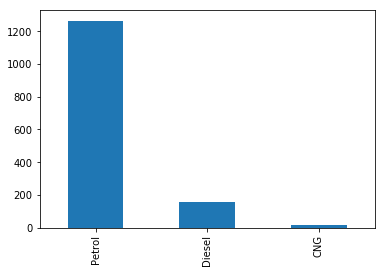

In [8]:
pd.value_counts(usedcarprices.FuelType).plot(kind='bar') 

In [9]:
pd.value_counts(usedcarprices.AutoType)

Manual    1356
Auto        80
Name: AutoType, dtype: int64

In [10]:
pd.value_counts(usedcarprices.MetColorType)

Metcolor       969
NonMetcolor    467
Name: MetColorType, dtype: int64

C

In [11]:
#CROSS TABULATION: TABLE OF TWO OR MORE CATEGORICAL OR STRING VALUES
pd.crosstab(usedcarprices.FuelType,usedcarprices.AutoType)

AutoType,Auto,Manual
FuelType,,
CNG,1,16
Diesel,0,155
Petrol,79,1185


In [12]:
pd.crosstab(usedcarprices.AutoType,usedcarprices.MetColorType)

MetColorType,Metcolor,NonMetcolor
AutoType,,
Auto,51,29
Manual,918,438


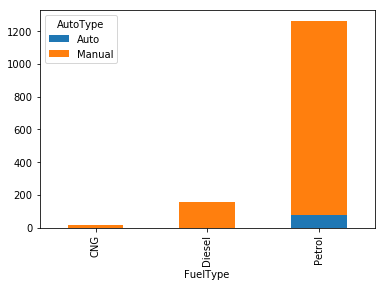

In [13]:
#CREATE STACKED BAR CHART OF FUEL TYPE AND AUTO TYPE
pd.crosstab(usedcarprices.FuelType,usedcarprices.AutoType).plot(kind='bar',stacked=True)

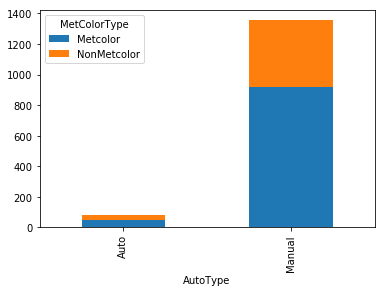

In [14]:
pd.crosstab(usedcarprices.AutoType,usedcarprices.MetColorType).plot(kind='bar',stacked=True)

In [15]:
#DATA MANIPULATION - CREATION OF CATEGORICAL VARIABLES FROM NUMERIC VARIABLES
#FOR DATA MANIPULATION - QUARTILES ARE USED FOR FIXING THE LOWER AND UPPER LIMITS FOR EACH CLASS OR GROUP

#BASED ON PRICE CREATE NEW VARIABLE CALLED PRICETYPE- HIGH PRICE, MEDIUM PRICE ,LOW PRICE CAR AND VERY HIGH PRICE CAR
usedcarprices.Price.describe()

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

In [16]:
#for loop with if statement

In [17]:
PriceType=[]
for row in usedcarprices.Price:
    if row>=12000:
        PriceType.append('VERY HIGH PRICE')
    elif row>=10000:
        PriceType.append('HIGH PRICE')
    elif row>=8500:
        PriceType.append('MEDIUM PRICE')
    else:
        PriceType.append('LOW PRICE')
usedcarprices['PriceType']=PriceType

In [18]:
pd.value_counts(usedcarprices.PriceType)

MEDIUM PRICE       450
LOW PRICE          372
VERY HIGH PRICE    315
HIGH PRICE         299
Name: PriceType, dtype: int64

In [19]:
#CREATE NEW VARIABLE CALLED USAGETYPE BASED ON NUM OF KILOMETERS RUN ON KM VARIABLE
#VERY HEAVY USE, HEAVY USE, MEDIUM USE & LOW USE - 4 CLASS VARIABLE


In [20]:
UsageType=[]
for row in usedcarprices.KM:
    if row>=87020.75:
        UsageType.append('VERY HEAVY USE')
    elif row>=63389.50:
        UsageType.append('HEAVY USE')
    elif row>=43000:
        UsageType.append('MEDIUM USE')
    else:
        UsageType.append('LOW USE')
usedcarprices['UsageType']=UsageType
    

In [21]:
pd.value_counts(usedcarprices.UsageType)

MEDIUM USE        361
VERY HEAVY USE    359
HEAVY USE         359
LOW USE           357
Name: UsageType, dtype: int64

In [22]:
#CREATE A NEW VARIABLE BASED ON HP 

In [23]:
usedcarprices.HP.describe()

count    1436.000000
mean      101.502089
std        14.981080
min        69.000000
25%        90.000000
50%       110.000000
75%       110.000000
max       192.000000
Name: HP, dtype: float64

In [24]:
HPType=[]
for row in usedcarprices.HP:
    if row>=110:
        HPType.append('high speed')
    elif row>=90:
        HPType.append('medium speed')
    else:
        HPType.append('low speed')
usedcarprices['HPType']=HPType

In [25]:
pd.value_counts(usedcarprices.HPType)

high speed      855
low speed       358
medium speed    223
Name: HPType, dtype: int64

In [26]:
usedcarprices.shape

(1436, 16)

In [27]:
#how many heavy use cars are high speed

In [28]:
pd.crosstab(usedcarprices.UsageType,usedcarprices.HPType)

HPType,high speed,low speed,medium speed
UsageType,,,
HEAVY USE,230,92,37
LOW USE,215,35,107
MEDIUM USE,233,71,57
VERY HEAVY USE,177,160,22


In [29]:
#INFERENTIAL STATISTICS - HYPOTHESIS TESTING IS COMPILATION OF MEANS OR AVERAGES

#THERE ARE TWO TYPES OF CARS- 80 AUTO CARS AND 1356 MANUAL CARS
#THE AVERAGE PRICE OF MANUAL CARS IS 10701.69174
#THE AVERAGE PRICE OF AUTO CARS IS 11224.62500
#IS THE DIFFERNECE OF 500$ STATISTICALLY SIGNIFICANT OR NOT
#NULL HYPOTHESIS - THE AVERAGE PRICES OF AUTO & MANUAL CARS IS EQUAL OR SAME
#ALTERNATE HYPOTHESIS - THE AVERAGE PRICES OF AUTO & MANUAL CARS IS NOT EQUAL OR NOT SAME
# y VARIABLE - PRICE - NUMERICAL & x VARIABLE - AUTOTYPE - NUMERICAL - TWO TYPES
#IN THIS CASE WE USE 2 SIMPLE INDEPENDENT T TEST
# IF THE p-VALUE IS LESS THAN 0.05 REJECT NULL HYPOTHESIS & ACCEPT THE ALTERNATIVE
# IF THE p-VAULE IS GREATER THAN 0.05 ACCEPT NULL & REJECT ALTERNATIVE
# 0.05 - ALPHA - 5% ERROR RATE - 95% CONFIDENCE LEVEL


In [30]:
usedcarprices.Price.groupby(usedcarprices.AutoType).mean()

AutoType
Auto      11224.62500
Manual    10701.69174
Name: Price, dtype: float64

In [31]:
from scipy import stats as st

In [32]:
automatic=usedcarprices[usedcarprices.AutoType=='Auto'] #subsetting the data
manual=usedcarprices[usedcarprices.AutoType=='Manual']

In [33]:
st.ttest_ind(automatic.Price,manual.Price) # 2 sample independent T Test
#SINCE THE p VALUE IS GREATER THAN 0.05, WE ACCEPT THE NULL
#THERE IS NO SIGNIFICANT DIFFERENCE IN THE AVERAGE PRICES OF AUTO AND MANUAL CARS
#THE DIFFERENCE OF 500$ DOESNOT MATTER

Ttest_indResult(statistic=1.2533921042135481, pvalue=0.21026735893250906)

In [34]:
#THERE ARE TWO TYPES OF MECOLORTYPE - METCOLOR & NON METCOLOR
# FIND THE AVERAGE PRICES USING GROUPBY FUNCTION
usedcarprices.Price.groupby(usedcarprices.MetColorType).mean()

MetColorType
Metcolor       11004.941176
NonMetcolor    10162.047109
Name: Price, dtype: float64

In [35]:
#NULL - THERE IS NO SIGNIFICANT DIFFERENCE IN AVERAGE PRICES OF METCOLOR AND NON METCOLOR CARS - BOTH MEANS ARE EQUAL
#ALTERNARIVE - THERE IS SIGNIFICANT DIFFERNCE IN AVERAGE PRICES OF METCOLOR AND NONMETCOLOR CARS- BOTH MEANS ARE NOT EQUAL

In [36]:
metcolor=usedcarprices[usedcarprices.MetColorType=='Metcolor']
nonmetcolor=usedcarprices[usedcarprices.MetColorType=='NonMetcolor']

In [37]:
st.ttest_ind(metcolor.Price,nonmetcolor.Price)

Ttest_indResult(statistic=4.1487018981997146, pvalue=3.5400828979506025e-05)

In [38]:
#SINCE p VALUE IS LESS THAN 0.05, REJECT THE NULL
#THERE IS SIGNIFICANT DIFFERENCE IN AVERAGE PRICES OF METCOLOR AND NONMETCOLOR
#THE DIFFERENCE OF 1000$ IS STATISTICALLY SIGNIFICANT


In [39]:
#ANOVA SIGLE FACTOR (FOR MORE THAN 2 VARIABLES)
#NULL - THE AVERAGE PRICES OF PETROL, DIESEL AND CNG CARS ARE EQUAL 
 # ALL MEANS ARE EQUAL
#ALTERNATE- THE AVERAGE PRICES OF PETROL,DIESEL AND CNG ARE NOT EQUAL
 # ALL MEANS ARE NOT EQUAL
    


In [40]:
usedcarprices.Price.groupby(usedcarprices.FuelType).mean()

FuelType
CNG        9421.176471
Diesel    11294.554839
Petrol    10679.310127
Name: Price, dtype: float64

In [41]:
petrol=usedcarprices[usedcarprices.FuelType=='Petrol']
diesel=usedcarprices[usedcarprices.FuelType=='Diesel']
cng=usedcarprices[usedcarprices.FuelType=='CNG']

In [42]:
st.f_oneway(petrol.Price,diesel.Price,cng.Price)

F_onewayResult(statistic=3.1171479782774179, pvalue=0.044583699346313316)

In [43]:
#SINCE p-VALUE IS LESS THAN 0.05 REJECT NULL THAT THE AVERAGE PRICES OF ALL THREE CARS IS EQUAL.
#THE DIFFERENCE IS STATISTICALLY SIGNIFICANT

In [44]:
#NULL- THE AVERAGE PRICES OF VERY HEAVY, HEAVY, MEDIUM AND LOW USE CAR PRICES ARE EQUAL
#FIRST DO THE GROUPBY OF PRICE AND USAGE TYPE
#CNDUCT THE ANOVA SINGLE FACTOR TEST AND INTERPRET

In [45]:
usedcarprices.Price.groupby(usedcarprices.UsageType).mean()

UsageType
HEAVY USE          9584.534819
LOW USE           14217.932773
MEDIUM USE        10654.193906
VERY HEAVY USE     8486.490251
Name: Price, dtype: float64

In [46]:
veryheavy=usedcarprices[usedcarprices.UsageType=='VERY HEAVY USE']
heavy=usedcarprices[usedcarprices.UsageType=='HEAVY USE']
medium=usedcarprices[usedcarprices.UsageType=='MEDIUM USE']
low=usedcarprices[usedcarprices.UsageType=='LOW USE']



In [47]:
st.f_oneway(veryheavy.Price,heavy.Price,medium.Price,low.Price)

F_onewayResult(statistic=257.99606239042993, pvalue=7.7372377005885965e-134)

In [48]:
usedcarprices.Age.groupby(usedcarprices.UsageType).mean()

UsageType
HEAVY USE         63.381616
LOW USE           38.168067
MEDIUM USE        56.326870
VERY HEAVY USE    65.810585
Name: Age, dtype: float64

In [49]:
st.f_oneway(veryheavy.Age,heavy.Age,medium.Age,low.Age)

F_onewayResult(statistic=243.42018313067641, pvalue=1.2766496121248569e-127)

In [50]:
#Chi-SQUARE TEST OF INDEPENDENCE - BOTH VARIABLES ARE CATEGORICAL

#THE INPUT OF Chi SQUARE TEST OF INDEPENDENCE IS CROSS TABULATION
# NULL - THERE IS NO RELATIONSHIP BETWEEN BOTH THE VARIABLES
# ALTERNATIVE - THERE IS RELATIONSHIP BETWEEN BOTH THE VARIABLES 

#NULL - THERE IS NO RELATIONSHIP BETWEEN FUELTYPE AND USAGE TYPE
#ALTERNATIVE - THERE IS RELATIONSHIP BETWEEN FUELTYPE AND USAGETYPE
pd.crosstab(usedcarprices.FuelType,usedcarprices.UsageType)

UsageType,HEAVY USE,LOW USE,MEDIUM USE,VERY HEAVY USE
FuelType,,,,
CNG,3,1,1,12
Diesel,22,16,15,102
Petrol,334,340,345,245


In [51]:
st.chi2_contingency(pd.crosstab(usedcarprices.FuelType,usedcarprices.UsageType))

(179.29367942002276,
 4.7929222527403627e-36,
 6,
 array([[   4.25      ,    4.22632312,    4.27367688,    4.25      ],
        [  38.75      ,   38.53412256,   38.96587744,   38.75      ],
        [ 316.        ,  314.23955432,  317.76044568,  316.        ]]))

In [52]:
#there is no relationship between UsageType and PriceType
#there is relationship between UsageType and PriceType

#DAY 3


In [53]:
usedcarprices.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,AutoType,MetColorType,PriceType,UsageType,HPType
0,1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Manual,Metcolor,VERY HIGH PRICE,MEDIUM USE,medium speed
1,2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Manual,Metcolor,VERY HIGH PRICE,HEAVY USE,medium speed
2,3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Manual,Metcolor,VERY HIGH PRICE,LOW USE,medium speed
3,4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Manual,NonMetcolor,VERY HIGH PRICE,MEDIUM USE,medium speed
4,5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Manual,NonMetcolor,VERY HIGH PRICE,LOW USE,medium speed


In [54]:
usedcarprices.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight', 'AutoType', 'MetColorType',
       'PriceType', 'UsageType', 'HPType'],
      dtype='object')

In [55]:
usedcarprices1=usedcarprices.drop('Unnamed: 0',axis=1)
#axis=1 is column deletion
#axis=0 is row deletion and this is default = 0

In [56]:
usedcarprices1.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'AutoType', 'MetColorType', 'PriceType', 'UsageType',
       'HPType'],
      dtype='object')

In [57]:
usedcarprices.dtypes

Unnamed: 0       int64
Price            int64
Age              int64
KM               int64
FuelType        object
HP               int64
MetColor         int64
Automatic        int64
CC               int64
Doors            int64
Weight           int64
AutoType        object
MetColorType    object
PriceType       object
UsageType       object
HPType          object
dtype: object

In [58]:
numericalcols=usedcarprices1.select_dtypes(include=[np.number])
objectcols=usedcarprices1.select_dtypes(include=["object"])

In [59]:
numericalcols.shape

(1436, 9)

In [60]:
objectcols.shape

(1436, 6)

In [61]:
#LabelEncoder is function in sklearn preprocessing which converts strings or objects or categoricals
#to Dummy coded Numerical variables
#In alphabetical orber
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()

In [63]:
objectcols1=objectcols.apply(le.fit_transform)

In [64]:
objectcols1.head()

,FuelType,AutoType,MetColorType,PriceType,UsageType,HPType
0,1,1,0,3,2,2
1,1,1,0,3,0,2
2,1,1,0,3,1,2
3,1,1,1,3,2,2
4,1,1,1,3,1,2


In [65]:
usedcarpricesdf=pd.concat([numericalcols,objectcols1],axis=1)

#Combining side by side joining of both dataforms
#axis=1 - column merge
#axis=0 - row merge

In [66]:
usedcarpricesdf.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType,AutoType,MetColorType,PriceType,UsageType,HPType
0,13500,23,46986,90,1,0,2000,3,1165,1,1,0,3,2,2
1,13750,23,72937,90,1,0,2000,3,1165,1,1,0,3,0,2
2,13950,24,41711,90,1,0,2000,3,1165,1,1,0,3,1,2
3,14950,26,48000,90,0,0,2000,3,1165,1,1,1,3,2,2
4,13750,30,38500,90,0,0,2000,3,1170,1,1,1,3,1,2


In [67]:
y=usedcarprices.Price
x=usedcarpricesdf.drop('Price',axis=1)

In [68]:
from sklearn.linear_model import LinearRegression  

In [69]:
LinReg=LinearRegression()

In [70]:
LinRegmodel=LinReg.fit(x,y)

In [71]:
LinRegmodel.score(x,y)  # R Squared of Linear Regression Model

0.87367570705895736

In [72]:
LinRegmodel.intercept_

-5372.5259937357951

In [73]:
LinRegmodel.coef_

array([ -1.19865254e+02,  -1.48567251e-02,   2.50498867e+01,
        -8.91870726e+00,   1.17236222e+02,  -1.56836623e+00,
        -5.76392900e+01,   2.17517405e+01,   2.07533048e+02,
        -1.17236222e+02,   8.91870726e+00,   3.28789358e+02,
        -2.86223377e+01,  -1.75194918e+02])

In [74]:
print(list(zip(x,LinRegmodel.coef_)))

[('Age', -119.8652537088296), ('KM', -0.014856725077739309), ('HP', 25.04988674479165), ('MetColor', -8.9187072551905935), ('Automatic', 117.23622160747658), ('CC', -1.5683662293863279), ('Doors', -57.639290013351456), ('Weight', 21.751740499116806), ('FuelType', 207.53304779818919), ('AutoType', -117.23622160747648), ('MetColorType', 8.9187072551896094), ('PriceType', 328.78935818839483), ('UsageType', -28.622337652786513), ('HPType', -175.1949177688291)]


In [75]:
LinRegpredict=LinRegmodel.predict(x)

In [76]:
LinRegpredict  
# these values calculated based on Regression Equationn using intercept and coeffiencts
# Price= -5372.525-119.865*Age-0.01485*KM+25.049*HP-8.9187+117.236*Automatic.......................-175.1949*HPType

array([ 16118.24392881,  15789.94173162,  16105.37023753, ...,
         8645.26189963,   8419.98605314,  10313.95951031])

In [77]:
priceresidual=y-LinRegpredict  # y = ActualPrice LinRegpredict = Predicted Price

In [78]:
priceresidual

0      -2618.243929
1      -2039.941732
2      -2155.370238
3       -811.420863
4      -1810.479777
5      -2007.850617
6        257.266572
7       1952.832857
8       1547.657346
9      -1385.385884
10       932.656782
11      -217.822288
12      -406.527522
13      2093.982968
14      3379.218429
15      2153.245287
16      3387.541690
17      1166.406864
18       875.792891
19      1490.511377
20       539.553426
21      -542.161647
22      -137.252931
23       475.646812
24      -199.674972
25      -939.958803
26       935.323444
27      -467.880347
28       663.553612
29      1401.454719
           ...     
1406    -422.338564
1407   -1360.123368
1408    1070.282143
1409    -880.767266
1410    1519.448053
1411    -731.532491
1412     398.717559
1413    -990.373363
1414    -413.097322
1415   -1924.782702
1416    -737.517286
1417    -126.522656
1418       2.364140
1419    -110.574236
1420   -1064.948057
1421      88.810287
1422    -644.731530
1423     757.223014
1424     -63.763143


In [79]:
np.sqrt(np.mean(priceresidual**2))  #Root Mean Square Error

1288.6514999923138

In [80]:
#DAY 4

from sklearn.tree import DecisionTreeRegressor

In [81]:
DecTree=DecisionTreeRegressor()

In [82]:
DecTreemodel=DecTree.fit(x,y)

In [83]:
DecTreemodel.score(x,y)

# 99.99% variance in dependent variable Price 

0.99999894052316707

In [84]:
DecTreepredict=DecTreemodel.predict(x)

In [85]:
DecTreeresidual=y-DecTreepredict

In [86]:
np.sqrt(np.mean(DecTreeresidual**2))  #Root Mean Square Error

3.7319668543103792

In [88]:
print(list(zip(x,DecTreemodel.feature_importances_)))

[('Age', 0.7911145890278467), ('KM', 0.028374616974692093), ('HP', 0.0036990004692389286), ('MetColor', 0.0013058629057274632), ('Automatic', 0.00014591958773804462), ('CC', 0.00051977192900461546), ('Doors', 0.0022573575737221243), ('Weight', 0.060122039653621472), ('FuelType', 0.00052956903246419325), ('AutoType', 5.2294441313529826e-05), ('MetColorType', 0.00042841995582227336), ('PriceType', 0.10946892950302825), ('UsageType', 0.0016222230252428097), ('HPType', 0.00035940592053737851)]


In [89]:
from sklearn.tree import export_graphviz

In [90]:
export_graphviz(DecTreemodel,out_file='tree.dot',feature_names = x.columns)

BAGGING - RANDOM FOREST

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
RF=RandomForestRegressor(n_estimators=1000)  #n_estimators=num of trees = 1000

In [93]:
RFmodel=RF.fit(x,y)

In [94]:
RFmodel.score(x,y)

0.99413937485866999

In [95]:
RFpredict=RFmodel.predict(x)

In [96]:
RFresidual=y-RFpredict

In [97]:
np.sqrt(np.mean(RFresidual**2))

277.56456239289179

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
GB=GradientBoostingRegressor(n_estimators=1000)

In [100]:
GBmodel=GB.fit(x,y)

In [101]:
GBmodel.score(x,y)

0.99452902994857717

In [102]:
GBpredict=GBmodel.predict(x)

In [103]:
GBresidual=y-GBpredict

In [104]:
np.sqrt(np.mean(GBresidual**2))

268.17865867333086